In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/superstore_clean.csv")

print(df.shape)
df.head()

(51252, 15)


,order_id,product_id,sales,profit,quantity,discount,order_date,ship_date,customer_id,customer_name,segment,category,sub_category,region,market
0,AE-2011-9160,OFF-FEL-10001405,83,-157.086,2,0.7,2011-10-03,2011-10-07,PO-88653,Patrick O'Donnell,Consumer,Office Supplies,Storage,EMEA,EMEA
1,AE-2011-9160,TEC-EPS-10004171,78,-88.992,6,0.7,2011-10-03,2011-10-07,PO-88653,Patrick O'Donnell,Consumer,Technology,Machines,EMEA,EMEA
2,AE-2013-1130,FUR-BUS-10003055,225,-232.272,6,0.7,2013-10-14,2013-10-14,EB-41102,Eugene Barchas,Consumer,Furniture,Bookcases,EMEA,EMEA
3,AE-2013-1130,OFF-ACC-10004278,4,-4.692,1,0.7,2013-10-14,2013-10-14,EB-41102,Eugene Barchas,Consumer,Office Supplies,Fasteners,EMEA,EMEA
4,AE-2013-1530,OFF-STI-10000114,17,-29.472,2,0.7,2013-12-31,2014-01-03,MY-73802,Maribeth Yedwab,Corporate,Office Supplies,Supplies,EMEA,EMEA


In [3]:
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
total_orders = df['order_id'].nunique()
total_customers = df['customer_id'].nunique()

total_sales, total_profit, total_orders, total_customers


(np.int64(12642905), np.float64(1467457.29128), 25035, 4873)

In [4]:
df[['sales','profit','quantity']].describe()

,sales,profit,quantity
count,51252.000000,51252.000000,51252.000000
mean,246.681203,28.632196,3.479123
std,488.103260,174.493660,2.282452
min,0.000000,-6599.978000,1.000000
25%,31.000000,0.000000,2.000000
50%,85.000000,9.240000,3.000000
75%,251.000000,36.810000,5.000000
max,22638.000000,8399.976000,17.000000


In [5]:
cat_table = df.groupby('category')[["sales", 'profit', 'quantity']].sum()
cat_table['profit_margin'] = cat_table['profit'] / cat_table['sales']
cat_table.sort_values('sales',ascending=False)

,sales,profit,quantity,profit_margin
category,,,,
Technology,4744691,663778.73318,35176,0.139899
Furniture,4110884,285204.72380,34954,0.069378
Office Supplies,3787330,518473.83430,108182,0.136897


In [6]:
seg_table = df.groupby('segment')[['sales', 'profit']].sum()
seg_table['profit_margin'] = seg_table['profit'] / seg_table['sales']
seg_table.sort_values('sales', ascending=False)

,sales,profit,profit_margin
segment,,,
Consumer,6508027,749229.46206,0.115124
Corporate,3824790,441206.79866,0.115355
Home Office,2310088,277021.03056,0.119918


In [7]:
reg_table = df.groupby('region')[['sales', 'profit']].sum()
reg_table['profit_margin'] = reg_table['profit'] / reg_table['sales']
reg_table.sort_values('sales',ascending= False)

,sales,profit,profit_margin
region,,,
Central,2822399,311403.98164,0.110333
South,1600960,140355.76618,0.087670
North,1248192,194597.95252,0.155904
Oceania,1100207,120089.11200,0.109151
Southeast Asia,884438,17852.32900,0.020185
North Asia,848349,165578.42100,0.195177
EMEA,806184,43897.97100,0.054452
Africa,783776,88871.63100,0.113389
Central Asia,752839,132480.18700,0.175974


In [8]:
loss_orders= df[df['profit']<0]
loss_orders.shape

(12541, 15)

In [9]:
loss_orders[['sales', 'profit']].sum()

sales     2.490050e+06
profit   -9.206462e+05
dtype: float64

In [10]:
loss_orders.groupby('category')[['sales', 'profit']].sum().sort_values('profit')

,sales,profit
category,,
Furniture,1081631,-370168.83970
Technology,784708,-286495.39842
Office Supplies,623711,-263981.91760


In [11]:
loss_orders.groupby('sub_category')[['sales', 'profit']].sum().sort_values('profit').head(15)

,sales,profit
sub_category,,
Tables,343667,-144123.14860
Bookcases,297628,-101446.29730
Phones,261360,-96417.66010
Chairs,370493,-96084.89690
Machines,195010,-78672.74030
Storage,240596,-76063.97800
Copiers,233305,-71547.49982
Appliances,157826,-63991.69040
Binders,64481,-52884.06130


In [12]:
loss_orders.groupby('region')[['sales','profit']].sum().sort_values('profit')

,sales,profit
region,,
Central,665550,-202196.36690
South,370706,-157234.74518
EMEA,126122,-123065.91300
Southeast Asia,361634,-89471.72840
Africa,63079,-88875.03300
Oceania,294320,-55973.18400
North,174467,-52134.83996
East,160870,-49590.60750
Central Asia,57588,-29568.05100


In [13]:
loss_orders.groupby(['region','category'])[['sales','profit']].sum().sort_values('profit')

sales       profit
region         category                            
Central        Furniture        274669 -81991.80430
South          Furniture        136563 -65454.91060
Central        Office Supplies  172808 -63748.31150
               Technology       218073 -56456.25110
South          Technology       138184 -50444.18038
EMEA           Technology        43233 -42960.26100
               Office Supplies   42590 -42292.09800
South          Office Supplies   95959 -41335.65420
Southeast Asia Furniture        138917 -39074.80170
EMEA           Furniture         40299 -37813.55400
Africa         Technology        20856 -30464.34900
               Office Supplies   22802 -30268.35900
               Furniture         19421 -28142.32500
North          Furniture        107478 -25975.87300
Southeast Asia Office Supplies  100580 -25928.80010
               Technology       122137 -24468.12660
Oceania        Furniture        133840 -24196.08900
East           Technology        46146 -20997.63220
Oceania        Technology        90947 -18860.89500
East           Furniture         87076 -18801.78540
North          Office Supplies   37521 -16504.49400
Caribbean      Furniture         30744 -14522.31600
North Asia     Furniture         42704 -12962.99100
Oceania        Office Supplies   69533 -12916.20000
West           Furniture         54785 -12657.93370
Central Asia   Technology        25477 -12037.06500
East           Office Supplies   27648  -9791.18990
North          Technology        29468  -9654.47296
Central Asia   Office Supplies   16976  -8956.53000
               Furniture         15135  -8574.45600
Caribbean      Technology        27842  -7253.06488
North Asia     Technology        12695  -6462.46500
West           Technology         9650  -6436.63530
North Asia     Office Supplies   11704  -6129.34500
West           Office Supplies   10490  -3626.39190
Caribbean      Office Supplies   15100  -2484.54400

In [14]:
loss_orders.groupby(pd.cut(loss_orders['discount'],bins=[0,0.1,0.2,0.3,0.4,1]))[['sales','profit']].sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3252\2418841167.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_orders.groupby(pd.cut(loss_orders['discount'],bins=[0,0.1,0.2,0.3,0.4,1]))[['sales','profit']].sum()


,sales,profit
discount,,
"(0.0, 0.1]",362295,-18398.41868
"(0.1, 0.2]",481424,-53362.22990
"(0.2, 0.3]",252992,-40720.69320
"(0.3, 0.4]",557083,-180333.33300
"(0.4, 1.0]",836256,-627831.48094


In [15]:
high_discount_df= df[df['discount'] > 0.30]
high_discount_df.shape

(10360, 15)

In [16]:
high_discount_df[['sales', 'profit']].sum()

sales     1.547702e+06
profit   -7.935265e+05
dtype: float64

In [17]:
high_discount_df.groupby('category')[['sales', 'profit']].sum()

,sales,profit
category,,
Furniture,589380,-300303.11370
Office Supplies,408235,-237162.11410
Technology,550087,-256061.24578


In [19]:
high_discount_df.groupby('sub_category')[['sales', 'profit']].sum().sort_values('profit')

,sales,profit
sub_category,,
Tables,229278,-120580.67280
Bookcases,198850,-89880.30070
Phones,177914,-87190.85940
Machines,132739,-72125.12960
Chairs,117580,-65477.76100
Storage,125154,-62799.43400
Copiers,157547,-59345.20028
Appliances,95830,-58089.73820
Binders,57985,-51905.66540


In [20]:
high_discount_df.groupby('segment')[['sales', 'profit']].sum().sort_values('profit')

,sales,profit
segment,,
Consumer,789888,-411965.14264
Corporate,467852,-235316.98890
Home Office,289962,-146244.34204


In [21]:
df['discount_bin']= pd.cut(df['discount'],bins=[0,0.1,0.2,0.3,0.4,1.0])
df.groupby('discount_bin')[['sales','profit']].sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3252\2783006754.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('discount_bin')[['sales','profit']].sum()


,sales,profit
discount_bin,,
"(0.0, 0.1]",1962633,338189.26138
"(0.1, 0.2]",1757296,173254.84340
"(0.2, 0.3]",382540,-21155.61312
"(0.3, 0.4]",701367,-166115.44870
"(0.4, 1.0]",846335,-627411.02488


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3252\1333056276.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_curve= df.groupby('discount_bin')[['profit']].sum()


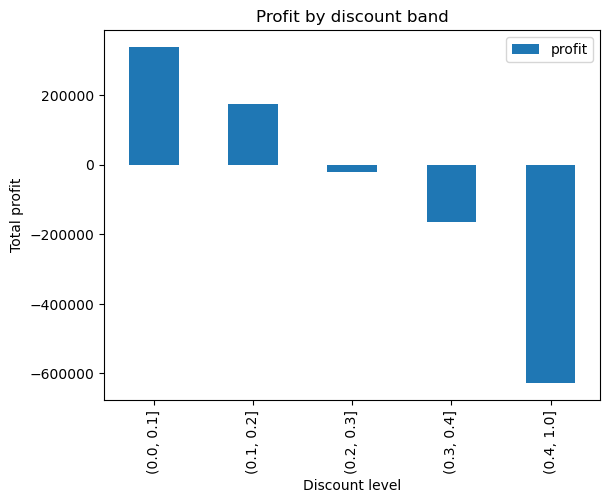

In [22]:
import matplotlib.pyplot as plt 
discount_curve= df.groupby('discount_bin')[['profit']].sum()

discount_curve.plot(kind="bar")
plt.title("Profit by discount band")
plt.ylabel('Total profit')
plt.xlabel('Discount level')
plt.show()

In [23]:
df['is_loss']= (df['profit']<0).astype(int)

In [24]:
df['is_loss'].mean()

np.float64(0.24469289003355968)

In [26]:
df.groupby('discount_bin')['is_loss'].mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3252\1289333021.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('discount_bin')['is_loss'].mean()


discount_bin
(0.0, 0.1]    0.192810
(0.1, 0.2]    0.233137
(0.2, 0.3]    0.621762
(0.3, 0.4]    0.802059
(0.4, 1.0]    0.984339
Name: is_loss, dtype: float64

In [28]:
df.groupby(['discount_bin','category'])['is_loss'].mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3252\1179437793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['discount_bin','category'])['is_loss'].mean()


discount_bin  category       
(0.0, 0.1]    Furniture          0.188257
              Office Supplies    0.218396
              Technology         0.146842
(0.1, 0.2]    Furniture          0.342541
              Office Supplies    0.176024
              Technology         0.252618
(0.2, 0.3]    Furniture          0.634179
              Office Supplies    0.612245
              Technology         0.550847
(0.3, 0.4]    Furniture          0.834518
              Office Supplies    0.788724
              Technology         0.789041
(0.4, 1.0]    Furniture          0.998217
              Office Supplies    0.981514
              Technology         0.982258
Name: is_loss, dtype: float64

In [30]:
safe_zone_df= df[df['discount'] <= 0.20]
safe_zone_df[['sales','profit']].sum() , safe_zone_df['is_loss'].mean()

(sales     1.071266e+07
 profit    2.282139e+06
 dtype: float64,
 np.float64(0.059183008991409325))

In [31]:
baseline = df[['sales', 'profit']].sum() , df['is_loss'].mean()
baseline

(sales     1.264290e+07
 profit    1.467457e+06
 dtype: float64,
 np.float64(0.24469289003355968))